In [0]:
# import the basic libraries and classes

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,RMSprop


### Import, analyze, and transform the data

In [0]:
df = pd.read_csv('wines.csv')

In [0]:
df.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [0]:
# look at class distribution to know how balanced the data is
df['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [0]:
# perform categorical encoding for the class column
k =pd.get_dummies(df['Class'],prefix = 'Class')
k.head()

,Class_1,Class_2,Class_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [0]:
# Perform linear transformation on numerical data so that all the values are between 0 and 1 

from sklearn.preprocessing import MinMaxScaler

In [0]:
mms = MinMaxScaler()
mms.fit_transform(df)

In [0]:
df1 = pd.DataFrame(mms.fit_transform(df),columns = df.columns)

In [0]:
df1.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [0]:
df1.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.469101,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.387517,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.500000,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,1.000000,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


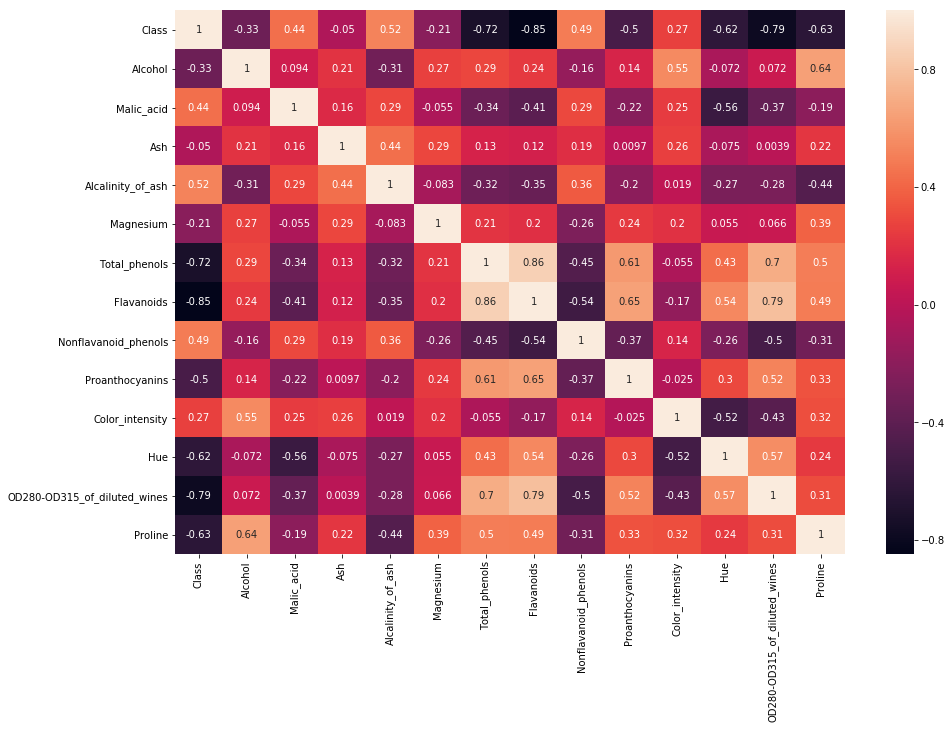

In [0]:
# analyze how correlated the features are

plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)

In [0]:
# see how correlated the class is with respect to the input features
df.corr()['Class'].sort_values()

Flavanoids                     -0.847498
OD280-OD315_of_diluted_wines   -0.788230
Total_phenols                  -0.719163
Proline                        -0.633717
Hue                            -0.617369
Proanthocyanins                -0.499130
Alcohol                        -0.328222
Magnesium                      -0.209179
Ash                            -0.049643
Color_intensity                 0.265668
Malic_acid                      0.437776
Nonflavanoid_phenols            0.489109
Alcalinity_of_ash               0.517859
Class                           1.000000
Name: Class, dtype: float64

In [0]:
df2 = df1.join(k)
df2.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline,Class_1,Class_2,Class_3
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,1,0,0
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,1,0,0
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,1,0,0
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,1,0,0
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,1,0,0


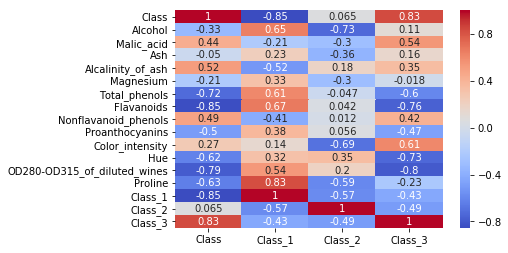

In [0]:
# visualize correlations
sns.heatmap(df2.corr()[['Class','Class_1','Class_2','Class_3']],cmap = 'coolwarm',annot=True)

In [0]:
sns.pairplot(df2,hue = 'Class')

### Build machine learning models and perform hyperparameter tuning

In [0]:
K.clear_session()

model = Sequential()

model.add(Dense(4,input_shape = (len(df1.columns)-1,),activation = 'sigmoid',kernel_initializer = 'he_normal'))
model.add(Dense(3,activation = 'softmax'))

model.compile(optimizer = RMSprop(lr = 0.35),loss = 'categorical_crossentropy',metrics =['accuracy'])


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# import a module for regular expressions
import re

In [0]:
X = df2.drop([x for x in df2.columns if re.match('^Class',x)],axis = 1)
y = df2[[x for x in df2.columns if re.match('^Class_',x)]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
h = model.fit(X_train,y_train,batch_size = 16,epochs = 15)

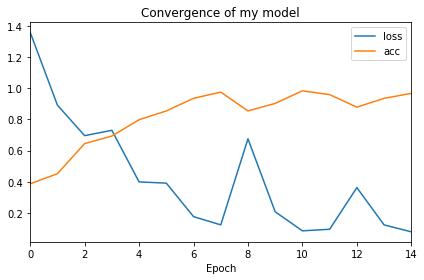

In [0]:

historydf = pd.DataFrame(h.history)
historydf.plot()
plt.xlabel('Epoch')
plt.title('Convergence of my model')
plt.tight_layout()

In [0]:
model.evaluate(x = X_test,y = y_test)

54/54 [==============================] - 0s 556us/step


[0.030906376463395578, 0.9814814748587432]






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
54/54 [==============================] - 0s 587us/step


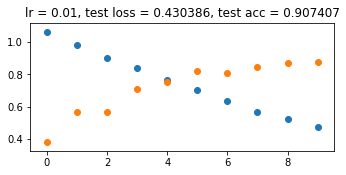

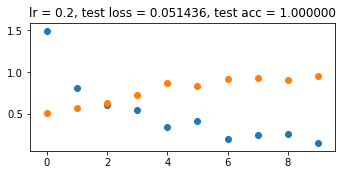

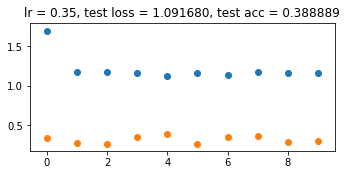

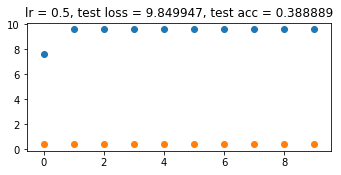

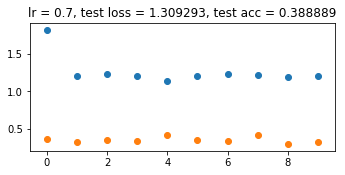

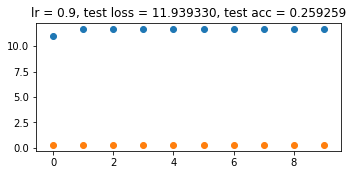

In [0]:
# try different learning rates and analyze performances

learning_rates = [0.01,0.2,0.35,0.5,0.7,0.9]
ind = 1

dflist = []

dfyo = pd.DataFrame()



for lr in learning_rates:
  
  plt.figure(figsize=(12,8))
  ax1=plt.subplot(3,2,ind)

  K.clear_session()
  model = Sequential()
  model.add(Dense(5,input_shape = (df.shape[1]-1,),activation = 'relu'))
  model.add(Dense(3,activation = 'softmax'))
  model.compile(optimizer = RMSprop(lr = lr),metrics = ['accuracy'],loss = 'categorical_crossentropy')
  h = model.fit(x = X_train,y = y_train,batch_size = 8,epochs = 10,verbose=0)
  result = model.evaluate(x = X_test,y = y_test)
  dfinterm = pd.DataFrame(h.history,index = h.epoch)
  dflist.append(dfinterm)
  ax1.scatter(x = h.epoch, y = h.history['loss'])
  plt.scatter(x = h.epoch, y = h.history['acc'])
  plt.title('lr = {}, test loss = {:3f}, test acc = {:3f}'.format(lr,result[0],result[1]))
  ind +=1
  

In [0]:
l = h.history.keys()
l = list(l)
l

In [0]:
# build a multi-index dataframe for better subsequent visualization

mi = pd.MultiIndex.from_product([learning_rates,l],names = ['lr','metrics'])
df4 = pd.concat(dflist,axis=1)
df4.columns = mi

In [0]:
df4.head()

lr           0.01                0.20  ...      0.70      0.90          
metrics      loss       acc      loss  ...       acc      loss       acc
0        1.070588  0.459677  1.269472  ...  0.403226  9.305035  0.379032
1        0.872688  0.717742  0.654040  ...  0.322581  9.618863  0.403226
2        0.744411  0.782258  0.548359  ...  0.346774  9.618863  0.403226
3        0.631191  0.814516  0.552355  ...  0.387097  9.618863  0.403226
4        0.533965  0.846774  0.571026  ...  0.282258  9.618863  0.403226

[5 rows x 12 columns]

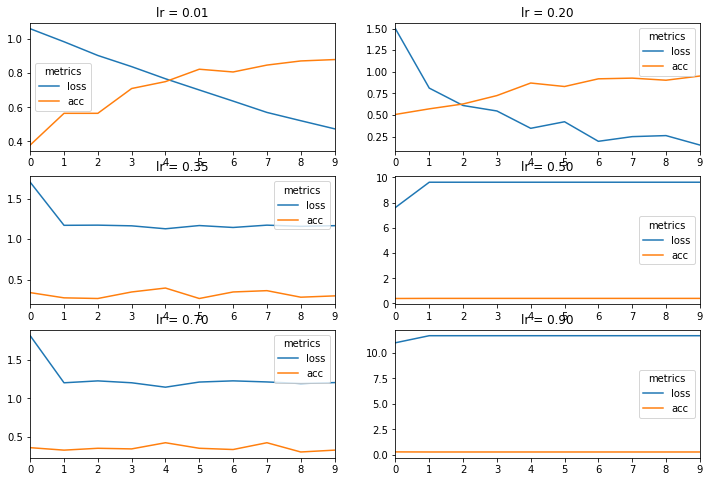

In [0]:
# in general, the lower the learning rate the more accurate the model, but the more time (i.e. epochs) you need

ind = 1

plt.figure(figsize = (12,8))

for lr in learning_rates:
 
  ax = plt.subplot(3,2,ind)
  df4.xs(key = lr,axis = 1,level = 'lr').plot(ax=ax)
  plt.title('lr = {:0.2f}'.format(lr))
  ind +=1

In [0]:
X = df1.drop('Class',axis = 1)
y = k


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
y_train.head()

In [0]:
from keras.optimizers import RMSprop,Adam,SGD

In [ ]:
# try different combinations for activation functions and kernel initializations to come up with the best performance
activations=['relu','sigmoid']
layers = [1,2,3]
k_inits = ['he_normal','Zeros']

combination = 1

df_acc = pd.DataFrame(columns = ['Layer 0', 'Layer 1', 'Layer 2','kernel_initialization','test accuracy'])

for a in activations:
  for b in activations:
    for c in activations:
      for i in k_inits:
        model = Sequential()
        model.add(Dense(8,input_shape = (13,),activation=a,kernel_initializer = i))
        model.add(Dense(5,activation = b))
        model.add(Dense(2,activation = c))
        model.add(Dense(3,activation = 'softmax'))
        model.compile(optimizer =RMSprop(lr = 0.01),loss = 'categorical_crossentropy',metrics = ['accuracy'])
        model.fit(X_train,y_train,batch_size = 8,epochs = 20,verbose = 0)
        scores = model.evaluate(X_test,y_test)
        df_acc = df_acc.append({'Layer 0':a,'Layer 1':b,'Layer 2':c, 'kernel_initialization':i,'test accuracy':scores[1]},ignore_index=True)
    

In [0]:
df_acc

,Layer 0,Layer 1,Layer 2,kernel_initialization,test accuracy
0,relu,relu,relu,he_normal,1.000000
1,relu,relu,relu,Zeros,0.388889
2,relu,relu,sigmoid,he_normal,0.777778
3,relu,relu,sigmoid,Zeros,0.388889
4,relu,sigmoid,relu,he_normal,1.000000
5,relu,sigmoid,relu,Zeros,0.388889
6,relu,sigmoid,sigmoid,he_normal,1.000000
7,relu,sigmoid,sigmoid,Zeros,0.388889
8,sigmoid,relu,relu,he_normal,0.944444
9,sigmoid,relu,relu,Zeros,0.388889


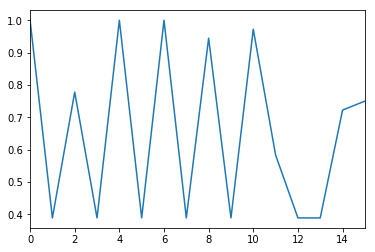

In [0]:
# visualize accuracy distribution by model. X-axis: the model; Y-axis: accuracy.
df_acc['test accuracy'].plot()

In [0]:
df_acc[df_acc['test accuracy']>0.95]

,Layer 0,Layer 1,Layer 2,kernel_initialization,test accuracy
0,relu,relu,relu,he_normal,1.000000
4,relu,sigmoid,relu,he_normal,1.000000
6,relu,sigmoid,sigmoid,he_normal,1.000000
10,sigmoid,relu,sigmoid,he_normal,0.972222


In [0]:
df_fin = df_acc[df_acc['test accuracy']==1]

In [0]:
# of the 16 combinations we tried, three demonstrated a 100% accuracy on the test data. We will refer to these models as [h1,h2,h3]

df_fin.

,Layer 0,Layer 1,Layer 2,kernel_initialization,test accuracy
0,relu,relu,relu,he_normal,1.0
4,relu,sigmoid,relu,he_normal,1.0
6,relu,sigmoid,sigmoid,he_normal,1.0


In [0]:
activations=['relu','sigmoid']
layers = [1,2,3]
k_inits = ['he_normal','Zeros']

combination = 1

df_acc = pd.DataFrame(columns = layers.append('kernel_initialization'))

In [0]:
columns = layers.append('kernel_initialization')

In [ ]:
df_yo=[]
 
K.clear_session() 
model = Sequential()
model.add(Dense(8,input_shape = (13,),activation='relu',kernel_initializer = 'he_normal'))
model.add(Dense(5,activation = 'relu'))
model.add(Dense(2,activation = 'relu'))
model.add(Dense(3,activation = 'softmax'))
model.compile(optimizer =RMSprop(lr = 0.01),loss = 'categorical_crossentropy',metrics = ['accuracy'])
h1 = model.fit(X_train,y_train,batch_size = 8,epochs = 20,verbose = 0)
df_yo.append(h1.history)

K.clear_session()
model = Sequential()
model.add(Dense(8,input_shape = (13,),activation='relu',kernel_initializer = 'he_normal'))
model.add(Dense(5,activation = 'sigmoid'))
model.add(Dense(2,activation = 'relu'))
model.add(Dense(3,activation = 'softmax'))
model.compile(optimizer =RMSprop(lr = 0.01),loss = 'categorical_crossentropy',metrics = ['accuracy'])
h2 = model.fit(X_train,y_train,batch_size = 8,epochs = 20,verbose = 0)
df_yo.append(h2.history)

K.clear_session()
model = Sequential()
model.add(Dense(8,input_shape = (13,),activation='relu',kernel_initializer = 'he_normal'))
model.add(Dense(5,activation = 'sigmoid'))
model.add(Dense(2,activation = 'sigmoid'))
model.add(Dense(3,activation = 'softmax'))
model.compile(optimizer =RMSprop(lr = 0.01),loss = 'categorical_crossentropy',metrics = ['accuracy'])
h3 = model.fit(X_train,y_train,batch_size = 8,epochs = 20,verbose = 0)
df_yo.append(h3.history)



In [0]:
columns = pd.MultiIndex.from_product([['h1','h2','h3'],['loss','acc']],names=['model','metrics'])


In [0]:
df_k1 =pd.DataFrame(df_yo[0],index=h1.epoch)
df_k2 =pd.DataFrame(df_yo[1],index=h2.epoch)
df_k3 =pd.DataFrame(df_yo[2],index=h3.epoch)

df_k=[df_k1,df_k2,df_k3]

In [0]:
df_k=pd.concat(df_k,axis=1)
df_k.columns = columns

In [0]:
h = ['h1','h2','h3']

In [0]:
df_k

model          h1                  h2                  h3          
metrics      loss       acc      loss       acc      loss       acc
0        0.952327  0.483871  1.042799  0.427419  1.098014  0.354839
1        0.799031  0.604839  0.906286  0.572581  1.079410  0.419355
2        0.736228  0.637097  0.788694  0.637097  1.054982  0.419355
3        0.695515  0.653226  0.710328  0.629032  1.013168  0.564516
4        0.661600  0.669355  0.644726  0.669355  0.963704  0.588710
5        0.626589  0.701613  0.602134  0.669355  0.899417  0.693548
6        0.603386  0.701613  0.567796  0.653226  0.843154  0.750000
7        0.606249  0.709677  0.554330  0.685484  0.788397  0.758065
8        0.551687  0.709677  0.543021  0.669355  0.732357  0.741935
9        0.538878  0.709677  0.526382  0.661290  0.699164  0.709677
10       0.534473  0.693548  0.513494  0.685484  0.667841  0.725806
11       0.505204  0.709677  0.502621  0.725806  0.636229  0.733871
12       0.494579  0.693548  0.489242  0.733871  0.614624  0.750000
13       0.473068  0.709677  0.476750  0.725806  0.587393  0.741935
14       0.417255  0.725806  0.452898  0.798387  0.577267  0.717742
15       0.374754  0.846774  0.416487  0.830645  0.560104  0.750000
16       0.340921  0.951613  0.385464  0.870968  0.536193  0.733871
17       0.287340  0.975806  0.347026  0.887097  0.531432  0.758065
18       0.256145  0.975806  0.295803  0.911290  0.527089  0.725806
19       0.233461  0.983871  0.263913  0.935484  0.506488  0.750000

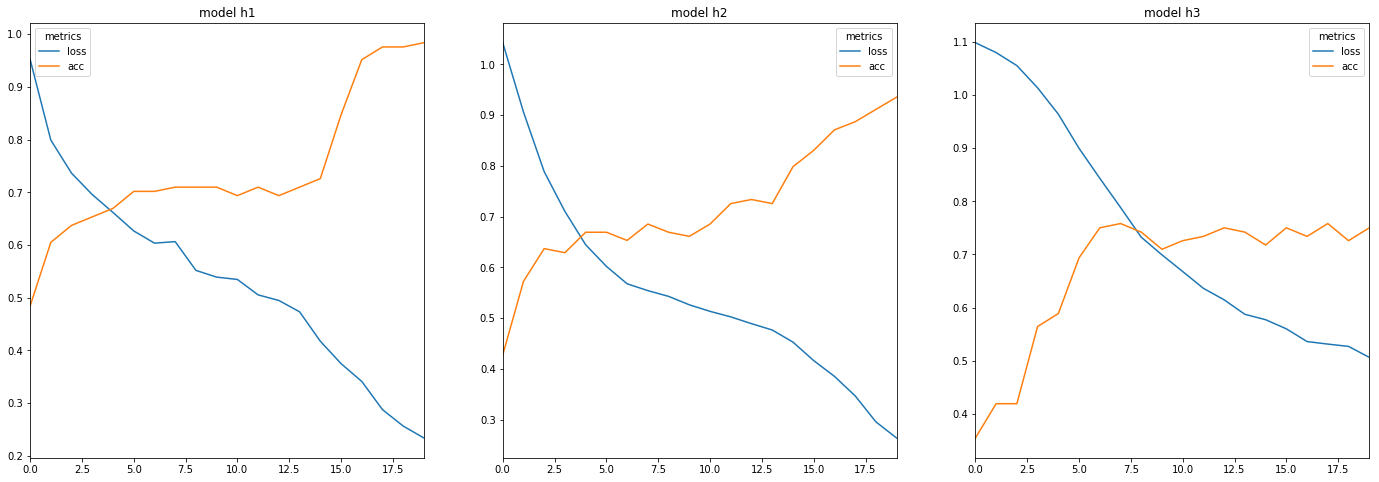

In [0]:
# the metrics are worse because before we did not clear the sessions, which we are doing now. 
# Still, one of the models (h1) reaches test accuracy > 98%

plt.figure(figsize=(24,8))

for i in range(1,4):
  ax = plt.subplot(1,3,i)
  df_k.xs(key = h[i-1],level = 'model',axis =1).plot(ax=ax)
  ax.set_title('model {}'.format(h[i-1]))
  

### Representing and visualizing the data in terms of two high level features (since a neural network is, in essence, a function) 

In [0]:
# define the features

inp = model.layers[0].input
out = model.layers[2].output

In [0]:
inp

<tf.Tensor 'dense_13_input:0' shape=(?, 13) dtype=float32>

In [0]:
out

<tf.Tensor 'dense_15/Relu:0' shape=(?, 2) dtype=float32>

In [0]:
f = K.function([inp],[out])

In [0]:
df_feat = pd.DataFrame(data = f([X_train])[0],columns = ['feat 1','feat 2'])

In [0]:
df_feat.head()

,feat 1,feat 2
0,0.000000,0.000000
1,0.666933,0.535795
2,0.201440,0.553970
3,0.450251,0.339614
4,0.574321,0.475650


In [0]:
K.clear_session()
model = Sequential()
model.add(Dense(8,input_shape = (13,),activation='tanh',kernel_initializer = 'he_normal'))
model.add(Dense(5,activation = 'tanh'))
model.add(Dense(2,activation = 'tanh'))
model.add(Dense(3,activation = 'softmax'))
model.compile(optimizer =RMSprop(lr = 0.01),loss = 'categorical_crossentropy',metrics = ['accuracy'])

#### Explore how the neural net learns to separate the classes with each epoch

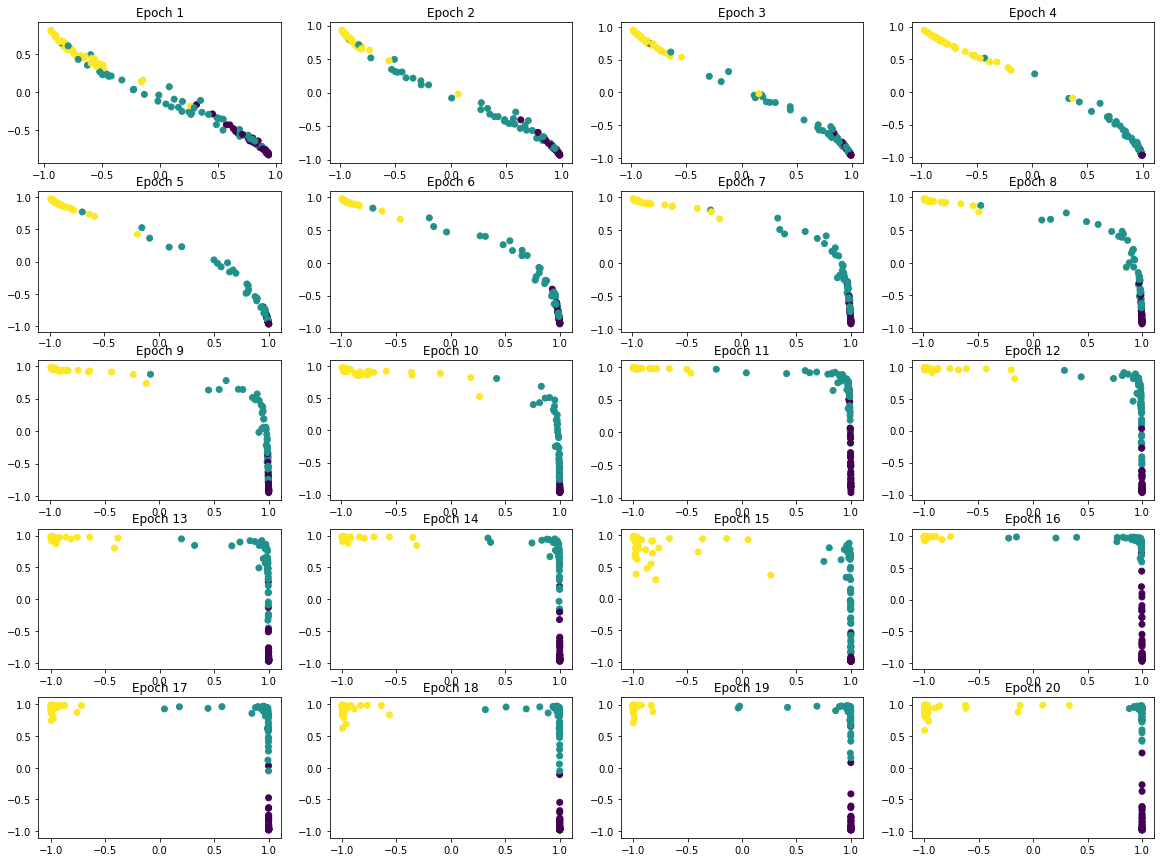

In [0]:
inp = model.layers[0].input
out = model.layers[2].output
features_function = K.function([inp],[out])


plt.figure(figsize=(20,15))

for i in range(0,20):
  
  ax = plt.subplot(5,4,i+1)
  
  model.fit(X_train,y_f.drop('Class',axis=1),batch_size = 8,epochs = 1,verbose = 0)
  f = features_function([X_train])[0]
  plt.scatter(f[:,0],f[:,1],c = y_f['Class'])
  plt.title('Epoch {}'.format(i+1))
